In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [5]:
data = pd.read_csv(r'../Data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Elbow curve')

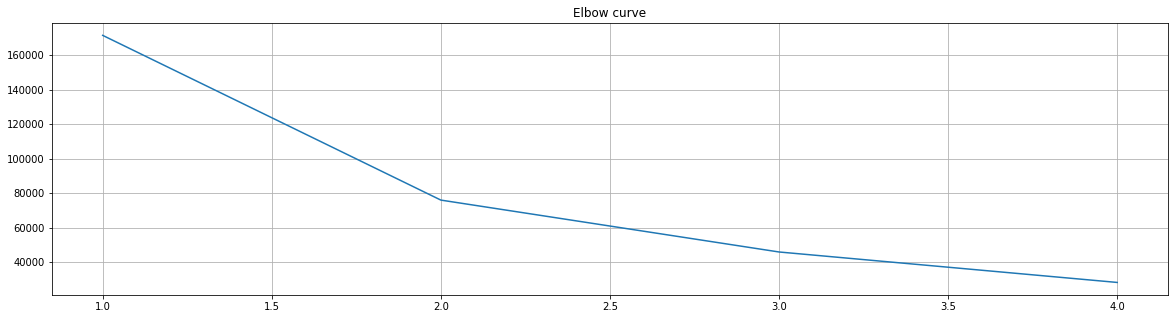

In [26]:
# Elbow Method to find K value
for_clustering = data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
distorsions = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(for_clustering)
    distorsions.append(kmeans.inertia_) # adding the sum of squared errors

# plotting the chart
fig = plt.figure(figsize=(20, 5))
plt.plot(range(1, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

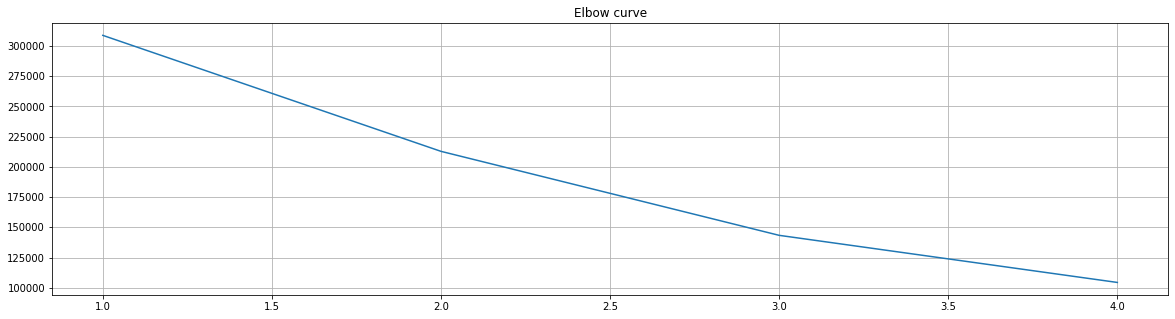

In [17]:
# Elbow Method to find K value
for_clustering = data[['Age' , 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
distorsions = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(for_clustering)
    distorsions.append(kmeans.inertia_) # adding the sum of squared errors

# plotting the chart
fig = plt.figure(figsize=(20, 5))
plt.plot(range(1, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

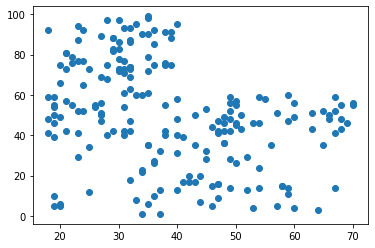

In [27]:
plt.scatter(for_clustering[:,0],for_clustering[:,1], label='True Position')

In [28]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(for_clustering)

KMeans(max_iter=100, n_clusters=3)

In [29]:
# Finding the centroids
print(kmeans.cluster_centers_)

[[29.56451613 80.74193548]
 [43.05494505 47.78021978]
 [42.95744681 14.59574468]]


In [30]:
# Getting the cluster mapping
print(kmeans.labels_)

[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 1 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


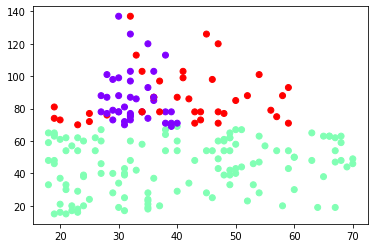

In [24]:
#plotting the cluster
plt.scatter(for_clustering[:,0],for_clustering[:,1], c=kmeans.labels_, cmap='rainbow')

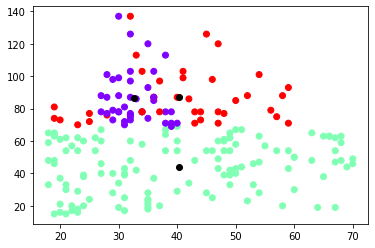

In [25]:
# Ploting the clusters with the centroid
plt.scatter(for_clustering[:,0], for_clustering[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [38]:
arr = kmeans.labels_
data['label'] = arr.tolist()
results = data[['Age' , 'Spending Score (1-100)', 'label']]

In [39]:
results.head()

,Age,Spending Score (1-100),label
0,19,39,1
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,1


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

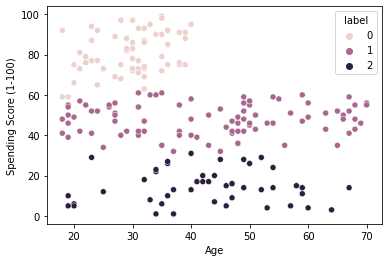

In [41]:

sns.scatterplot(x="Age", y="Spending Score (1-100)", data=data, hue="label")